In [741]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore') 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import lightgbm as lgb
from sklearn.preprocessing import StandardScaler 
from sklearn.base import TransformerMixin,BaseEstimator
from bayes_opt import BayesianOptimization
from lightgbm import plot_importance
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, log_loss

In [715]:
data = pd.read_csv('C:/Users/zhouz/Desktop/python_project/电信客户流失数据集/train.csv')
pd.set_option('display.max_columns', None)

In [716]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [717]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [718]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [719]:
data[data['TotalCharges']==' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [720]:
data['TotalCharges'] = data['TotalCharges'].apply(pd.to_numeric, errors='coerce') 
data['Churn'] = data['Churn'].map({'Yes':1,'No':0})

In [721]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [722]:
data['TotalCharges'] = data['TotalCharges'].fillna(data['MonthlyCharges'])

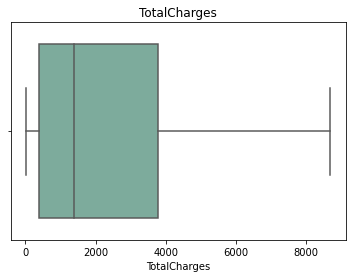

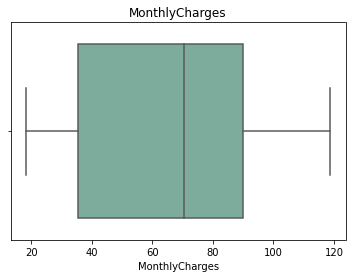

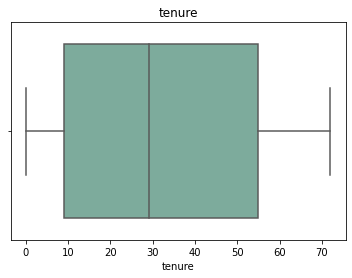

In [723]:
cols = ['TotalCharges','MonthlyCharges','tenure']
for col in cols:
    sns.boxplot(x = col,saturation=0.5,palette='Set2',data = data)
    plt.title(col)
    plt.show()

([<matplotlib.patches.Wedge at 0x24e20e42a30>,
 [Text(-0.7393678277834757, 0.8144539368428056, '0'),
  Text(0.8065830016677729, -0.8884952793462697, '1')],
 [Text(-0.4032915424273503, 0.44424760191425755, '73.46%'),
  Text(0.4705067509728674, -0.5182889129519906, '26.54%')])

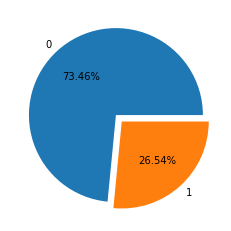

In [724]:
p = data['Churn'].value_counts()
plt.pie(p,labels=p.index,autopct='%1.2f%%',explode=(0,0.1))

In [725]:
def plot_stats(cols):
    for col in cols:
        sub_df1 = data[col].value_counts()
        sub_df2 = data.groupby([col]).mean()
        fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(12,4))
        plt.suptitle('Churn of {}'.format(col) )
        sns.set_color_codes("pastel")
        sns.barplot(y=sub_df1.index, x=sub_df1,ax=ax1)
        sns.barplot(y=sub_df2.index, x=sub_df2['Churn'], ax=ax2)
        plt.show()
   

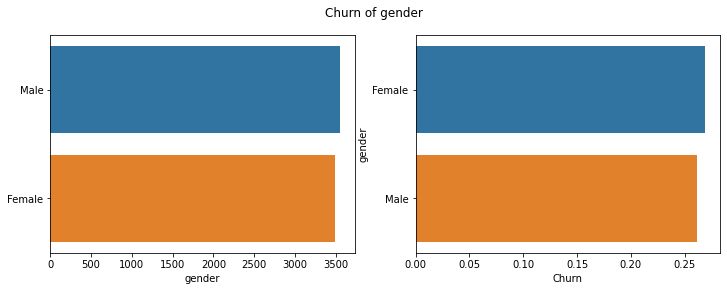

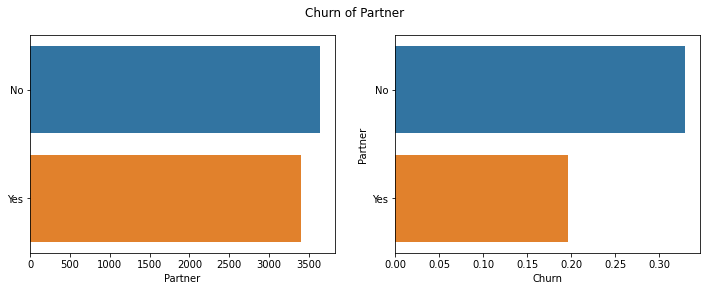

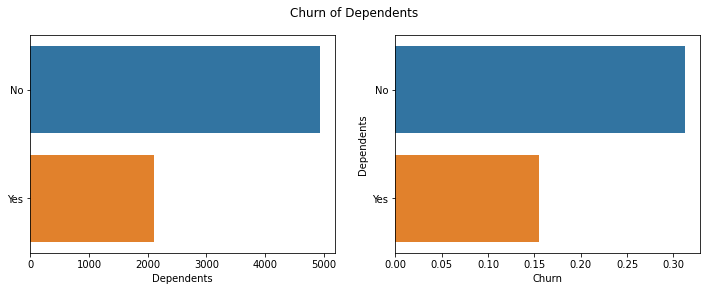

In [726]:
plot_stats(['gender',  'Partner', 'Dependents'])

In [727]:
data.groupby('SeniorCitizen')['Churn'].mean()

SeniorCitizen
0    0.236062
1    0.416813
Name: Churn, dtype: float64

Text(0.5, 1.0, 'churn of (senior = 1)')

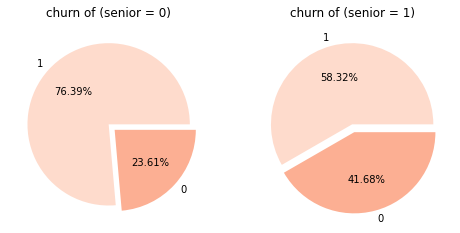

In [728]:
plt.figure(figsize=(8,6))
plt.subplot(121)
sub1 = data[data['SeniorCitizen']==0]['Churn'].value_counts()
plt.pie(sub1,labels=[1,0],colors = sns.color_palette("Reds"),autopct='%1.2f%%',explode=(0,0.1))
plt.title('churn of (senior = 0)')
plt.subplot(122)
sub2 = data[data['SeniorCitizen']==1]['Churn'].value_counts()
plt.pie(sub2,labels=[1,0],colors = sns.color_palette("Reds"),autopct='%1.2f%%',explode=(0,0.1))
plt.title('churn of (senior = 1)')

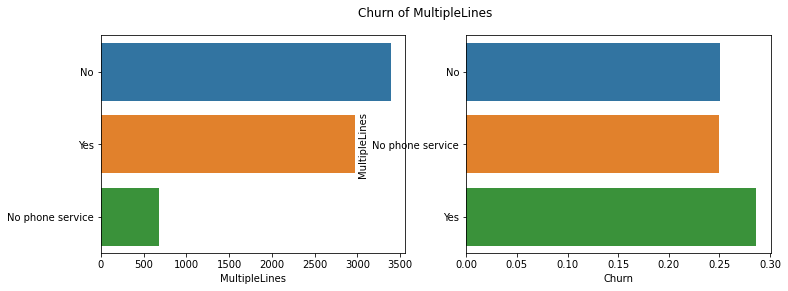

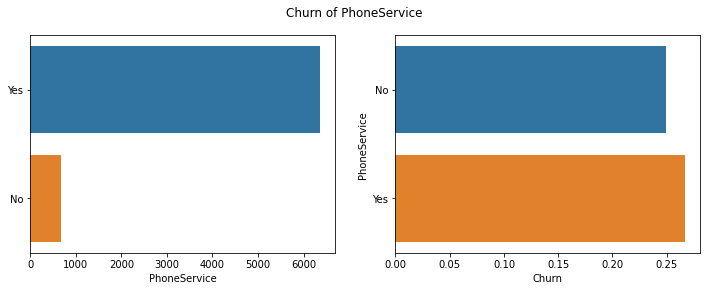

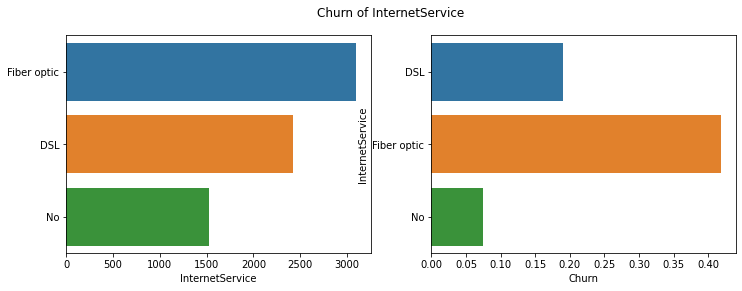

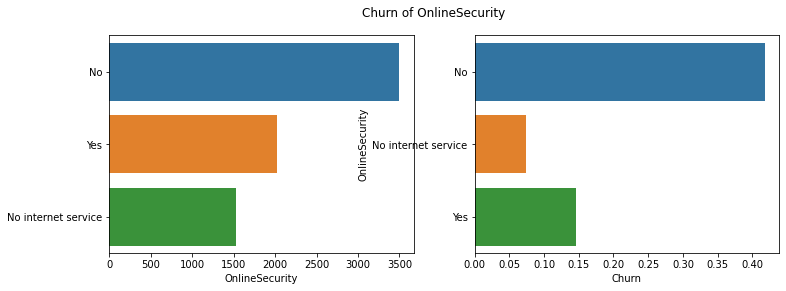

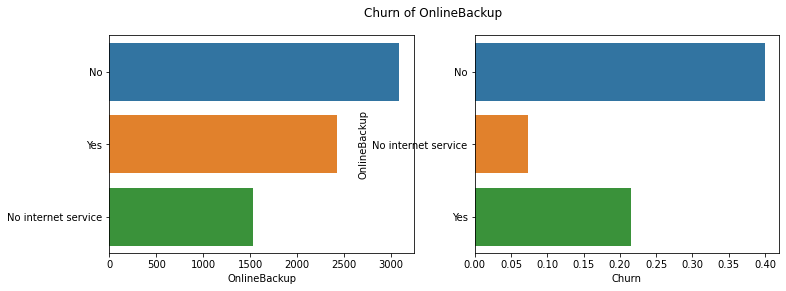

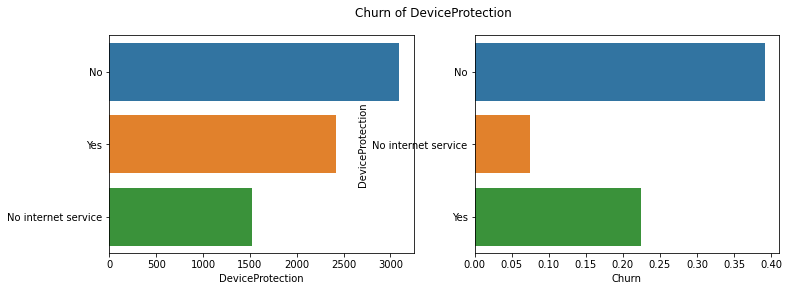

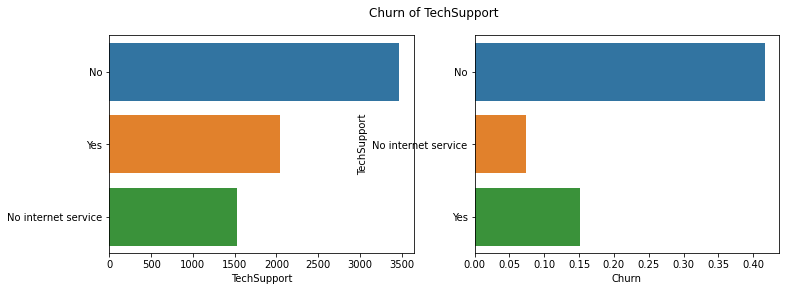

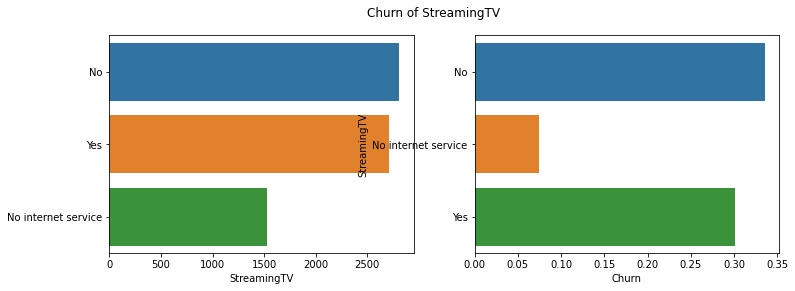

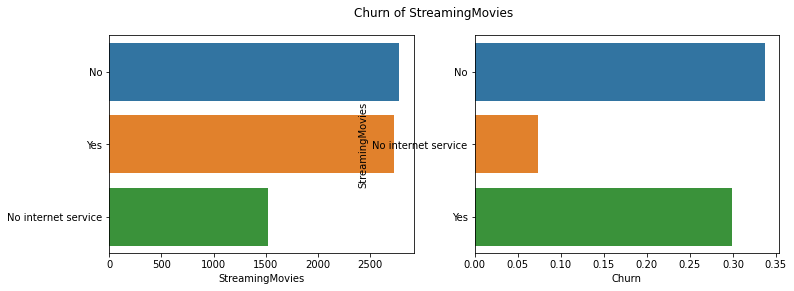

In [729]:
cols = ['MultipleLines','PhoneService','InternetService','OnlineSecurity', 'OnlineBackup',
        'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
plot_stats(cols)

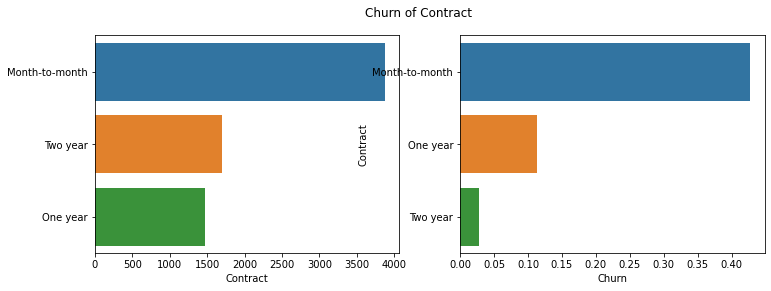

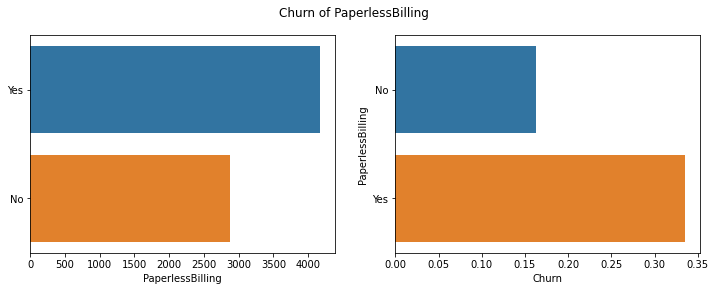

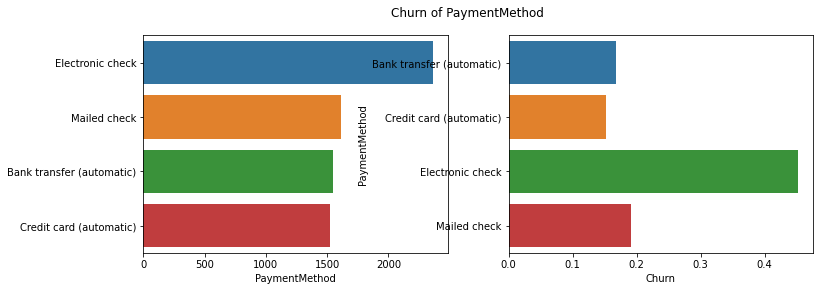

In [730]:
plot_stats(['Contract','PaperlessBilling','PaymentMethod'])

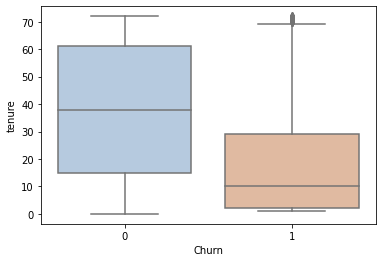

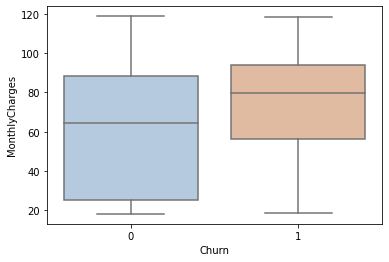

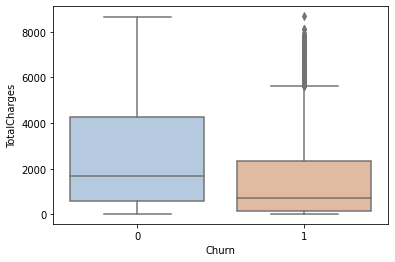

In [731]:
cols = ['tenure','MonthlyCharges','TotalCharges']
for col in cols:
    sns.boxplot(x = 'Churn',y = col,saturation = 0.5,palette = 'pastel',data=data)
    plt.show()

In [732]:
data.loc[data['MultipleLines']=='No phone service', 'MultipleLines'] = 'No'
internetCols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for i in internetCols:
    data.loc[data[i]=='No internet service', i] = 'No'

In [733]:
class CustomDummifier(TransformerMixin):
    def __init__(self, cols=None):
        self.cols = cols

    def transform(self, X):
        return pd.get_dummies(X, columns=self.cols)

    def fit(self, *_):
        return self


class CustomEncoder(TransformerMixin):
    def __init__(self, cols, ordering=None):
        self.cols = cols
        self.ordering = ordering

    def transform(self, df):
        X = df.copy()
        for col in self.cols:
            X[col] = X[col].map(lambda x: self.ordering.index(x))
        return X

    def fit(self, *_):
        return self


ce = CustomEncoder(cols=['Partner','Dependents', 'MultipleLines','OnlineSecurity', 'OnlineBackup','DeviceProtection','TechSupport',
                         'PaperlessBilling'],ordering=['No','Yes'])
cd = CustomDummifier(cols= ['InternetService', 'Contract', 'PaymentMethod'])
data = ce.fit_transform(data)
data = cd.fit_transform(data)

<AxesSubplot:>

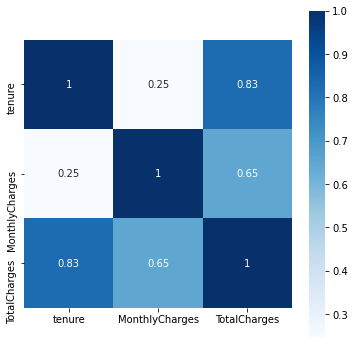

In [734]:
numerical_fea = ['tenure', 'MonthlyCharges', 'TotalCharges']
plt.figure(figsize=(6,6))
sns.heatmap(data[numerical_fea].corr(),square=True,annot=True,cmap='Blues')


In [735]:
data = data.drop(['customerID', 'gender', 'PhoneService', 'StreamingTV', 'StreamingMovies','TotalCharges'], axis=1)

In [736]:
X_train = data.drop(['Churn'],axis=1)
y_train= data['Churn']

x_train,x_test,y_train,y_test = train_test_split(X_train,y_train,test_size=0.2,random_state=2020)
dtrain = lgb.Dataset(x_train, label=y_train)
dtest = lgb.Dataset(x_test, label=y_test)

In [744]:
def lgb_model(num_leaves, max_depth, bagging_fraction, feature_fraction, bagging_freq, min_data_in_leaf,
              min_child_weight, min_split_gain, reg_lambda, reg_alpha):
   
    model_lgb = lgb.LGBMClassifier(boosting_type='gbdt', objective='binary', metric='auc',
                                   learning_rate=0.01, n_estimators=2000,
                                   num_leaves=int(num_leaves), max_depth=int(max_depth),
                                   bagging_fraction=round(bagging_fraction, 2),
                                   feature_fraction=round(feature_fraction, 2),
                                   bagging_freq=int(bagging_freq), min_data_in_leaf=int(min_data_in_leaf),
                                   min_child_weight=min_child_weight, min_split_gain=min_split_gain,
                                   reg_lambda=reg_lambda, reg_alpha=reg_alpha,
                                   n_jobs=8)
    val = cross_val_score(model_lgb, x_train, y_train, cv=5, scoring='roc_auc', error_score='raise').mean()
    return val

bayes_lgb = BayesianOptimization(lgb_model,
                                 {
                                  'num_leaves': (10, 200),
                                  'max_depth': (3, 20),
                                  'bagging_fraction': (0.5, 1.0),
                                  'feature_fraction': (0.5, 1.0),
                                  'bagging_freq': (0, 100),
                                  'min_data_in_leaf': (10, 100),
                                  'min_child_weight': (0, 10), 
                                  'min_split_gain': (0.0, 1.0),
                                  'reg_alpha': (0.0, 10),
                                  'reg_lambda': (0.0, 10)
                                 }
)

bayes_lgb.maximize(n_iter=10)

|   iter    |  target   | baggin... | baggin... | featur... | max_depth | min_ch... | min_da... | min_sp... | num_le... | reg_alpha | reg_la... |
-------------------------------------------------------------------------------------------------------------------------------------------------
[LightGBM] [Warning] feature_fraction is set=0.82, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.82
[LightGBM] [Warning] min_data_in_leaf is set=86, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=86
[LightGBM] [Warning] bagging_fraction is set=0.86, subsample=1.0 will be ignored. Current value: bagging_fraction=0.86
[LightGBM] [Warning] bagging_freq is set=35, subsample_freq=0 will be ignored. Current value: bagging_freq=35
[LightGBM] [Warning] feature_fraction is set=0.82, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.82
[LightGBM] [Warning] min_data_in_leaf is set=86, min_child_samples=20 will be ignored. Current value: min

In [745]:
params = {
            'boosting_type': 'gbdt',
            'objective': 'binary',
            'metric': 'auc',
            'learning_rate': 0.04,
            'num_leaves': 43, 
            'max_depth': 18,
            'min_data_in_leaf':91, 
            'min_child_weight':7.12,
            'bagging_fraction': 0.94, 
            'feature_fraction': 0.53,
            'bagging_freq':99,
            'reg_lambda': 2.26,
            'reg_alpha': 6.88,
            'min_split_gain': 0.08,
            'seed': 2020,
            'silent': True,   
            'n_jobs':-1
}   
lgb_model = lgb.train(params, train_set=dtrain, num_boost_round=20000,valid_sets=dtest, verbose_eval=1000, early_stopping_rounds=200)
test_pred = model.predict(x_test, num_iteration=model.best_iteration)

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Number of positive: 1523, number of negative: 4111
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002476 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 366
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.270323 -> initscore=-0.992984
[LightGBM] [Info] Start training from score -0.992984
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20

调参后lightgbm在验证集上的AUC：0.8518194769955247


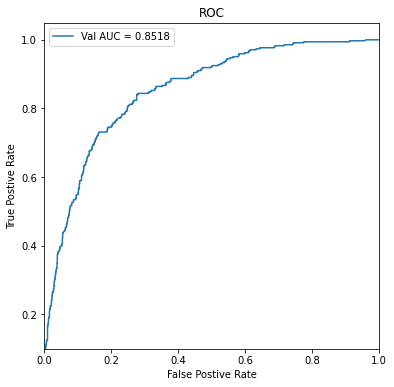

In [746]:
fpr,tpr,threshold = metrics.roc_curve(y_test,test_pred)
roc_auc = metrics.auc(fpr,tpr)
print('调参后lightgbm在验证集上的AUC：{}'.format(roc_auc))
plt.figure(figsize=(6,6))
plt.plot(fpr,tpr,label='Val AUC = %0.4f'%roc_auc)
plt.xlabel('False Postive Rate')
plt.ylabel('True Postive Rate')
plt.xlim(0,1)
plt.ylim(0.1)
plt.title('ROC')
plt.legend()
plt.show()

<AxesSubplot:title={'center':'gain'}, xlabel='Feature importance', ylabel='Features'>

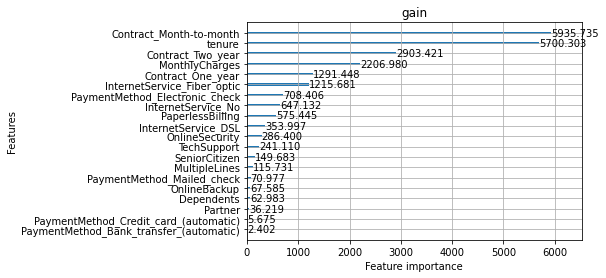

In [747]:
plot_importance(lgb_model,importance_type='gain',title = 'gain')